## Load the Data

#### First of all I am importing all the necessary libraries

In [1]:
import pandas as pd
import os 
import glob
import numpy as np
from scipy import stats
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Removing the warning to make code look cleaner

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Reading all the csv files in my current directory and creating the dataframe df1 that contains all the csv files data, using pandas concat function

In [3]:
csv_files = glob.glob('*.{}'.format('csv'))
csv_files

['Test 4.csv', 'Test 5.csv', 'Test 2.csv', 'Test 3.csv', 'Test 1.csv']

In [4]:
df1 = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [5]:
df1.head(2)

,Part Name,Attribution code,Model,Fuel Type,Section,CITY,REGION,VEND_CODE,ODOMETER,PLANT_CODE,FCOK_DATE,REGD_DATE,REPAIR_DATE,PROCESSING_DATE
0,Part 14,E,Model 14,DIESEL MODELS,Transmission,ALLAHABAD,N3,F031,27369,6,18-Jan-19,30-Jan-19,15-Jan-21,08-Apr-21
1,Part 14,E,Model 15,DIESEL MODELS,Transmission,NAWANSHAHR,N2,F031,16182,B,09-Oct-19,30-Oct-19,19-Mar-21,07-Apr-21


## Data Wrangling 

#### Getting the information about all the features using pandas info() method (type of variable, not null count)

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140006 entries, 0 to 140005
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Part Name         140006 non-null  object
 1   Attribution code  140006 non-null  object
 2   Model             140006 non-null  object
 3   Fuel Type         140006 non-null  object
 4   Section           140006 non-null  object
 5   CITY              140006 non-null  object
 6   REGION            140006 non-null  object
 7   VEND_CODE         140006 non-null  object
 8   ODOMETER          140006 non-null  int64 
 9   PLANT_CODE        139998 non-null  object
 10  FCOK_DATE         140006 non-null  object
 11  REGD_DATE         139697 non-null  object
 12  REPAIR_DATE       140006 non-null  object
 13  PROCESSING_DATE   140006 non-null  object
dtypes: int64(1), object(13)
memory usage: 15.0+ MB


### Dealing with missing values

#### As null values are negligiable in comparison to whole dataset in count so dropping all the null values

In [7]:
df1.isna().sum()

Part Name             0
Attribution code      0
Model                 0
Fuel Type             0
Section               0
CITY                  0
REGION                0
VEND_CODE             0
ODOMETER              0
PLANT_CODE            8
FCOK_DATE             0
REGD_DATE           309
REPAIR_DATE           0
PROCESSING_DATE       0
dtype: int64

In [8]:
df1.dropna(inplace=True)

### Data Formatting

#### Converting date columns into Pandas DateTime format

In [9]:
date_cols = df1.columns[10:14]
df1[date_cols] = df1[date_cols].apply(pd.to_datetime, errors='coerce')

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139689 entries, 0 to 140005
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Part Name         139689 non-null  object        
 1   Attribution code  139689 non-null  object        
 2   Model             139689 non-null  object        
 3   Fuel Type         139689 non-null  object        
 4   Section           139689 non-null  object        
 5   CITY              139689 non-null  object        
 6   REGION            139689 non-null  object        
 7   VEND_CODE         139689 non-null  object        
 8   ODOMETER          139689 non-null  int64         
 9   PLANT_CODE        139689 non-null  object        
 10  FCOK_DATE         139689 non-null  datetime64[ns]
 11  REGD_DATE         139689 non-null  datetime64[ns]
 12  REPAIR_DATE       139689 non-null  datetime64[ns]
 13  PROCESSING_DATE   139689 non-null  datetime64[ns]
dtypes: d

#### Creating new colummn which shows Usage Month
I considered usage months from manufacturing date to repair date instead of this I could also use timframe from registration date to repair date

In [11]:
df1['USAGE_MONTHS'] = round((df1['REPAIR_DATE'] - df1['FCOK_DATE']) / np.timedelta64(1, 'M'))

In [12]:
df1.sample(2)

,Part Name,Attribution code,Model,Fuel Type,Section,CITY,REGION,VEND_CODE,ODOMETER,PLANT_CODE,FCOK_DATE,REGD_DATE,REPAIR_DATE,PROCESSING_DATE,USAGE_MONTHS
68366,Part 14,E,Model 15,DIESEL MODELS,Transmission,KAIPAMANGALAM,S3,F031,18062,A,2019-02-05,2019-02-23,2020-09-09,2020-09-28,19.0
40025,Part 2,E,Model 16,PETROL MODELS,Petrol Engine,DIBRUGARH,E3,T348,13849,7,2020-08-14,2020-09-18,2021-11-10,2022-01-13,15.0


### Outlier detection
In our data we have two numerical values one is odometer readings and second the feature we just created USAGE_MONTHS <br>
First I create the boxplot for both variables. <br>
Then I calculate the 98 percentile value and removed the data which lies beyond that value



<AxesSubplot:>

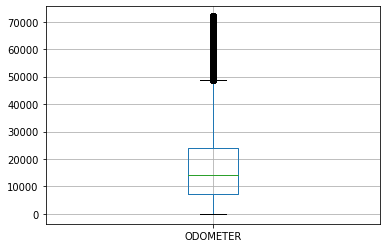

In [13]:
df1.boxplot(column = ['ODOMETER'])

In [14]:
 df1.quantile(0.98)

ODOMETER        39800.0
USAGE_MONTHS       27.0
Name: 0.98, dtype: float64

In [15]:
df2 = df1[df1['ODOMETER'] <= 40000]

<AxesSubplot:>

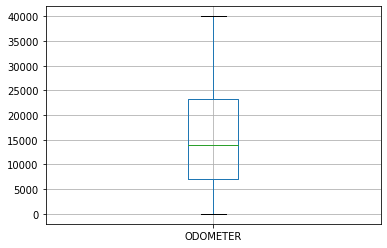

In [16]:
df2.boxplot(column = ['ODOMETER'])

<AxesSubplot:>

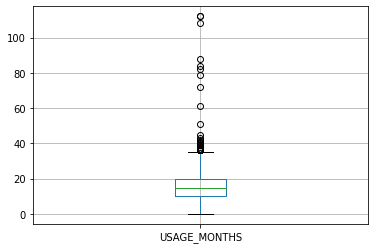

In [17]:
df2.boxplot(column = ['USAGE_MONTHS'])

In [18]:
df3 = df2[df2['USAGE_MONTHS'] <= 28]

<AxesSubplot:>

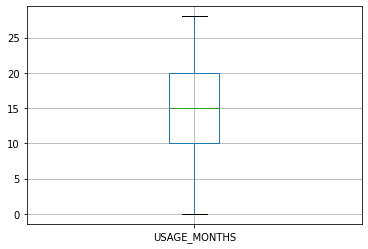

In [19]:
df3.boxplot(column = ['USAGE_MONTHS'])

#### Here we could also use usual outlier detection methods <br>
Using IQR = Q3(75) - Q1(25) and then calculating lower_bound = q1 - (iqr * 1.5) and upper_bound = q3 + (iqr * 1.5) by this formula <br>
Or we could calculate z-score(scipy.stats.zscore) and removing values which got zscore value more than 3

#### Converting usage months value into integer then bin these values into 3M, 6M, 12M and 12+M and use them as target 

In [20]:
df3["USAGE_MONTHS"] = df3["USAGE_MONTHS"].astype(int)

### Binning

In [21]:
df3['target'] = pd.cut(df2['USAGE_MONTHS'], bins=[0,3,6,12,29], 
                          labels=['1', '2', '3', '0'])

In [22]:
df3.dropna(inplace = True)

#### When i counted the distinct values in each column using the pandas groupyby method I found out
CITY has 1161 distinct values. <br> 
VEND_CODE has 109 distinct values. <br>
REGION has 19 distinct values.

In [23]:
[len(df3.groupby('CITY')),
 len(df3.groupby('VEND_CODE')),
 len(df3.groupby('REGION')),]

[1161, 109, 19]

<AxesSubplot:xlabel='REGION'>

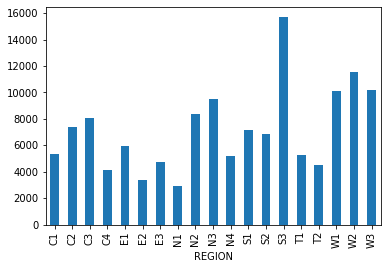

In [24]:
df3.groupby("REGION").size().plot(kind='bar')

#### I dropped these values for the sake of simplifying the model and dropped the date columns as they were already used to create usage months variable

In [25]:
df4 = df3.drop(['CITY','VEND_CODE','FCOK_DATE','REGD_DATE', 
           'PROCESSING_DATE', 'REGION'], axis = 1)

### Turning categorical variables into numerical

Fuel Type has two values DIESEL MODELS and PETROL MODELS so I map these to 0 and 1

In [26]:
df4['Fuel Type'] = df4['Fuel Type'].map({'DIESEL MODELS':0, 'PETROL MODELS':1})

Renamed the columns

In [27]:
df4.rename(columns = {'Fuel Type':'petrol','Part Name':'part', 'Model':'model',
                       'Attribution code':'code','ODOMETER':'odometer','Section':'section',
                      'PLANT_CODE':'plant','REPAIR_DATE':'faultdate','USAGE_MONTHS':'usage'}, inplace = True)

#### Encoding all the categorical variables into numerical using Label Encoder as it does not increase the dimensionality

In [28]:
from sklearn.preprocessing import LabelEncoder
le_part = LabelEncoder()
le_code = LabelEncoder()
le_model = LabelEncoder()
le_section = LabelEncoder()
le_plant = LabelEncoder()

df4['part'] = le_part.fit_transform(df4['part'])
df4['code'] = le_code.fit_transform(df4['code'])
df4['model'] = le_model.fit_transform(df4['model'])
df4['section'] = le_section.fit_transform(df4['section'])
df4['plant'] = le_plant.fit_transform(df4['plant'])

#### Creating an new feature faultmonth from faultdate for plotting purpose

In [29]:
df4['faultmonth'] = df4['faultdate'].dt.to_period('M')

Sorting the Values by faultdate

In [30]:
df4.sort_values(by='faultdate', inplace = True)

In [31]:
df4.reset_index(inplace = True)
df4.drop(['index','faultdate'], axis=1, inplace = True)

In [32]:
df4.describe()

,part,code,model,petrol,section,odometer,plant,usage
count,136335.000000,136335.000000,136335.000000,136335.000000,136335.000000,136335.000000,136335.000000,136335.000000
mean,11.175656,3.283148,8.159152,0.793465,4.744475,15952.705798,2.577497,14.811787
std,8.160103,1.323785,5.889122,0.404821,2.419431,10508.969083,1.814414,6.547104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,4.000000,4.000000,1.000000,3.000000,7046.000000,1.000000,10.000000
50%,11.000000,4.000000,6.000000,1.000000,5.000000,13955.000000,3.000000,15.000000
75%,19.000000,4.000000,13.000000,1.000000,7.000000,23177.000000,4.000000,20.000000
max,24.000000,4.000000,22.000000,1.000000,8.000000,40000.000000,7.000000,28.000000


## Model Development

In [33]:
len(df4)

136335

In [34]:
df4.head()

,part,code,model,petrol,section,odometer,plant,usage,target,faultmonth
0,6,4,8,0,8,35251,1,25,0,2018-04
1,6,1,1,1,8,14491,0,13,0,2018-04
2,18,4,0,1,7,20044,0,17,0,2018-08
3,21,4,5,0,4,4553,5,2,1,2018-08
4,3,4,12,0,7,23675,3,13,0,2018-08


#### Splitting data into main and validation set

In [35]:
df = df4.iloc[:100000,:]
df_val = df4.iloc[100000:,:]

#### Creating input and target dataset for validation set

In [36]:
X_val = df_val.drop(['faultmonth', 'target', 'part', 'petrol' ,'usage', 'odometer'], axis=1)
y_val = df_val['part']

#### Creating different dataframe for 3M, 6M, and 12M analysis

In [37]:
df_3M = df[df['target'] == '1']
df_6M = df[df['target'] == '2']
df_12M = df[df['target'] == '3']

#### Creating an input and output dataset for whole dataset (including all months)

In [38]:
df.sample(5)

,part,code,model,petrol,section,odometer,plant,usage,target,faultmonth
85467,20,4,3,1,3,3817,3,7,3,2021-02
7119,11,4,14,1,5,16302,0,20,0,2019-12
66206,19,4,4,1,3,5463,2,8,3,2020-11
31298,5,4,5,0,8,14836,6,10,3,2020-03
69052,1,4,4,0,0,21168,2,14,0,2020-11


I did not understand the problem statement completely. Intially I was considering "faultmonths" my target variable and I prepared my data keeping that in mind. Later I thought that "part" should be my target variable so I considered "part" as target variable just for the sake of showing my approach. I still need the clarity about what should be the target variable.

In [38]:
X = df_val.drop(['faultmonth', 'target', 'part', 'petrol' ,'usage', 'odometer'], axis=1)
y = df_val['part']

I dropped usage and odometer because they do not show signification contribution in my model so after trial and error I removed these variables

#### Splitting the dataset into training and testing

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)

#### Calculating model accuracy based on model score (Ussed RandomForest after comapring with other models)

In [40]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.7489221172369508

#### Determing the feature importance using mutual information. I have used all the columns initaially and chose the important ones

In [44]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.38056929, 0.76421533, 1.78420926, 0.42702759])

#### Using validation dataset to check wheter my model is robust or not

In [42]:
rf.score(X_val,y_val)

0.7519746800605477

### Plotting 3M trend

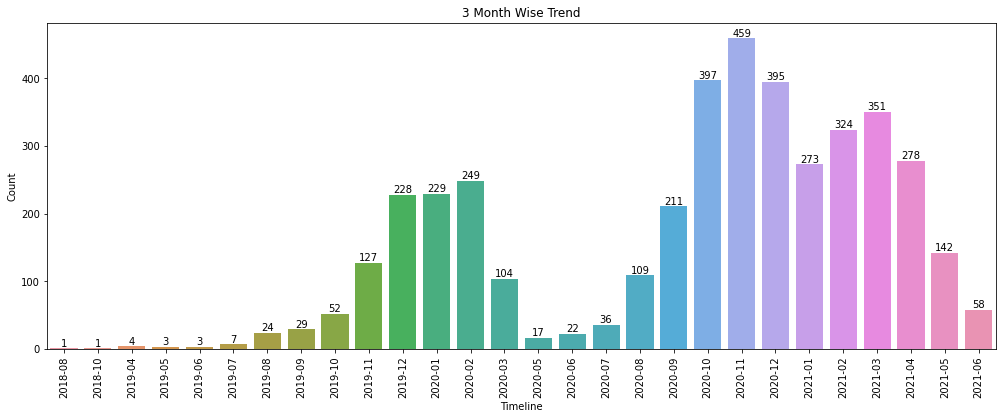

In [45]:

plt.figure(figsize=(17,6))

graph = sns.countplot(x ='faultmonth', data = df_3M)
graph.bar_label(graph.containers[0])

plt.xticks(rotation=90, horizontalalignment="center")
plt.title("3 Month Wise Trend")
plt.xlabel("Timeline")

plt.ylabel("Count")
plt.show()

### Plotting 6M trend

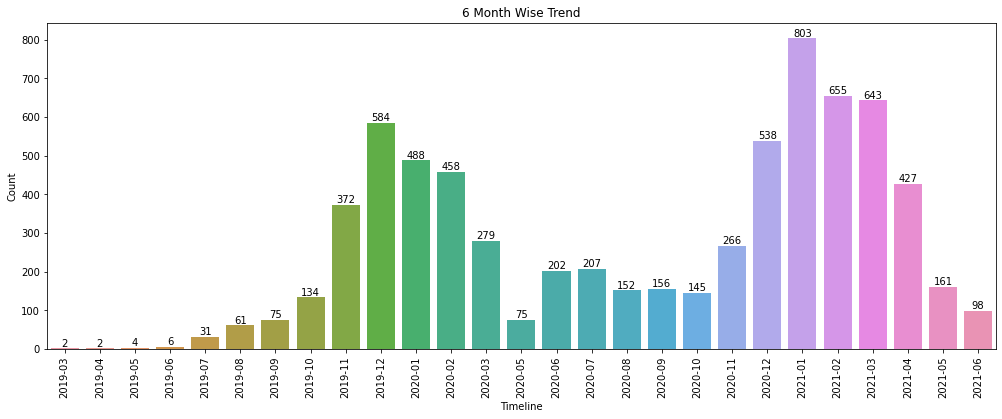

In [42]:

plt.figure(figsize=(17,6))

graph = sns.countplot(x ='faultmonth', data = df_6M)
graph.bar_label(graph.containers[0])

plt.xticks(rotation=90, horizontalalignment="center")
plt.title("6 Month Wise Trend")
plt.xlabel("Timeline")

plt.ylabel("Count")
plt.show()

### Plotting 12M trend

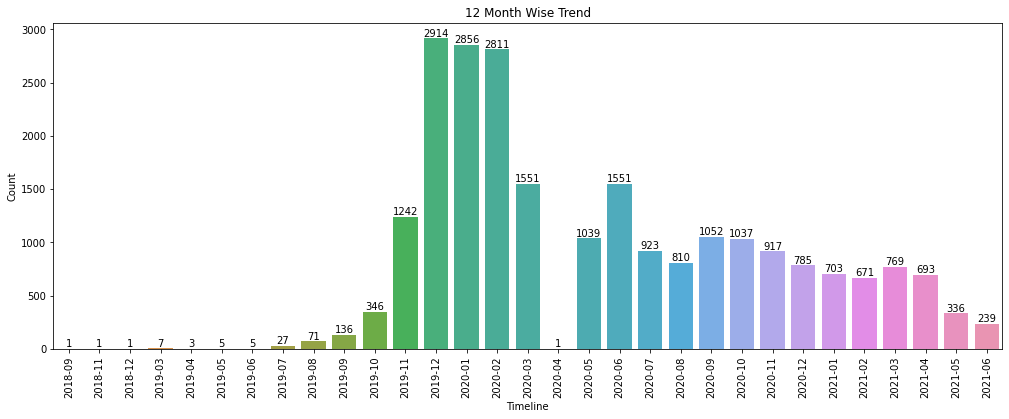

In [43]:
plt.figure(figsize=(17,6))

graph = sns.countplot(x ='faultmonth', data = df_12M)
graph.bar_label(graph.containers[0])

plt.xticks(rotation=90, horizontalalignment="center")
plt.title("12 Month Wise Trend")
plt.xlabel("Timeline")

plt.ylabel("Count")
plt.show()

## What I have missed

#### Did not do normalisation

In [ ]:
# Extra
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
df[['odometer','usage']] = scaler.fit_transform(df[['odometer','usage']])
df_val[['odometer','usage']] = scaler.fit_transform(df_val[['odometer','usage']])

#### Did not run Chi square test for feature selection

<AxesSubplot:>

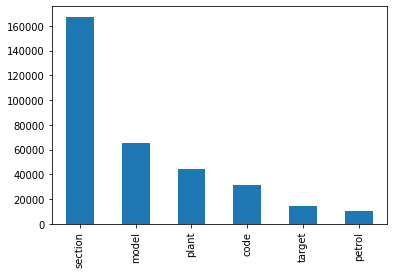

In [46]:
df_x = df4.drop(['faultmonth','usage', 'odometer', 'part'], axis=1)
df_y = df4['part']
from sklearn.feature_selection import chi2
chi_score = chi2(df_x,df_y)
chi_val = pd.Series(chi_score[0], index = df_x.columns)
chi_val.sort_values(ascending=False, inplace=True)
chi_val.plot(kind='bar')

<AxesSubplot:>

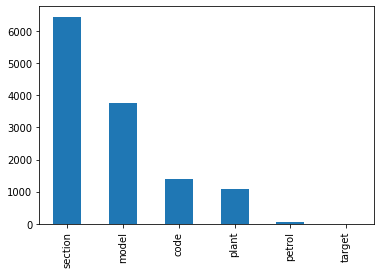

In [47]:
df_3M = df4[df4['target'] == '1']
df_x3 = df_3M.drop(['faultmonth','usage', 'odometer', 'part'], axis=1)
df_y3 = df_3M['part']

from sklearn.feature_selection import chi2
chi_score = chi2(df_x3,df_y3)
chi_val = pd.Series(chi_score[0], index = df_x3.columns)
chi_val.sort_values(ascending=False, inplace=True)
chi_val.plot(kind='bar')

<AxesSubplot:>

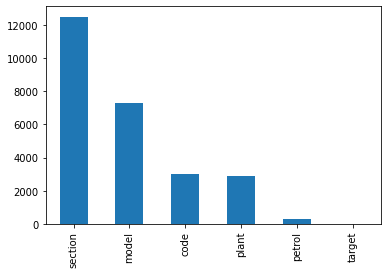

In [48]:
df_6M = df4[df4['target'] == '2']
df_x6 = df_6M.drop(['faultmonth','usage', 'odometer', 'part'], axis=1)
df_y6 = df_6M['part']

from sklearn.feature_selection import chi2
chi_score = chi2(df_x6,df_y6)
chi_val = pd.Series(chi_score[0], index = df_x6.columns)
chi_val.sort_values(ascending=False, inplace=True)
chi_val.plot(kind='bar')

<AxesSubplot:>

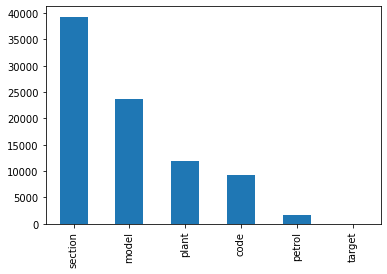

In [49]:
df_12M = df4[df4['target'] == '3']
df_x12 = df_12M.drop(['faultmonth','usage', 'odometer', 'part'], axis=1)
df_y12 = df_12M['part']

from sklearn.feature_selection import chi2
chi_score = chi2(df_x12,df_y12)
chi_val = pd.Series(chi_score[0], index = df_x12.columns)
chi_val.sort_values(ascending=False, inplace=True)
chi_val.plot(kind='bar')

### Model Evaluation (classification report)

Text(69.0, 0.5, 'Truth')

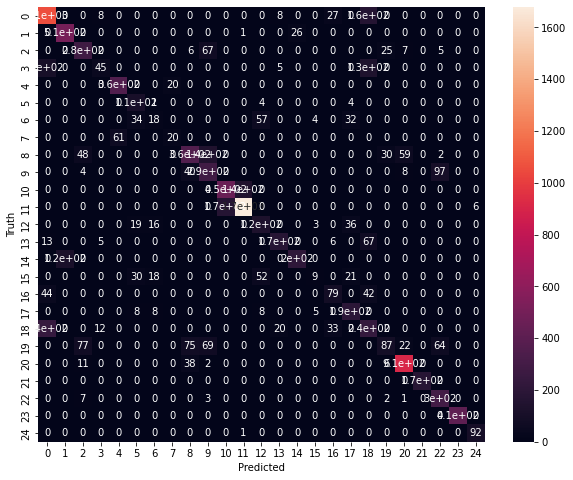

In [61]:
from sklearn.metrics import confusion_matrix
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.84      0.78      1262
           1       0.81      0.95      0.87       533
           2       0.66      0.72      0.69       392
           3       0.64      0.16      0.26       282
           4       0.86      0.95      0.90       380
           5       0.55      0.92      0.69       119
           6       0.30      0.12      0.17       145
           7       0.50      0.25      0.33        81
           8       0.69      0.56      0.62       636
           9       0.51      0.66      0.57       437
          10       0.73      0.76      0.75       594
          11       0.92      0.91      0.91      1852
          12       0.51      0.63      0.56       199
          13       0.84      0.65      0.74       263
          14       0.89      0.63      0.74       323
          15       0.43      0.07      0.12       130
          16       0.54      0.48      0.51       165
          17       0.67    